# Plotting GPU VS CPU

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd 


In [2]:
tasks = [5,10,15,20]
time_array = []

for task in tasks:
    time_array.append(np.genfromtxt(f"./Run1_20Tasks/run_times_3000_3000_5_{task}only5.csv", delimiter=",")[:-1])#,invalid_raise=False)#, usemask=True))
time_array

[array([3.0000e+03, 2.6050e+00, 1.9321e+01]),
 array([3000.    ,    5.1574,   19.381 ]),
 array([3000.   ,    8.071,   19.415]),
 array([3000.   ,   11.042,   19.476])]

In [3]:
time_cpu = []
time_gpu = []
for array in time_array:
    print(array)
    time_gpu.append(array[1])
    time_cpu.append(array[2])

[3.0000e+03 2.6050e+00 1.9321e+01]
[3000.        5.1574   19.381 ]
[3000.       8.071   19.415]
[3000.      11.042   19.476]


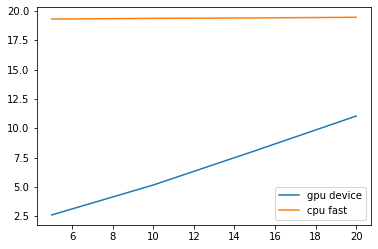

In [4]:

plt.plot(tasks,time_gpu,label="gpu device")

plt.plot(tasks, time_cpu,label="cpu fast")

plt.legend()
#plt.savefig("times5_to_20.png")

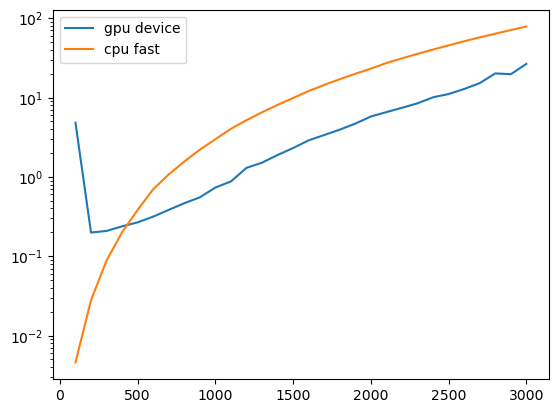

In [27]:
times = np.genfromtxt("./Run1_20Tasks/run_times_3000_100_20_20full.csv", delimiter=",")[:,:-1]#,invalid_raise=False)#, usemask=True)

plt.semilogy(times[:,0],times[:,1],label="gpu device")
plt.semilogy(times[:,0],times[:,2],label="cpu fast")
#semilogy

plt.legend()
#plt.savefig("times.png")
#plt.show()


## Huge Matrices

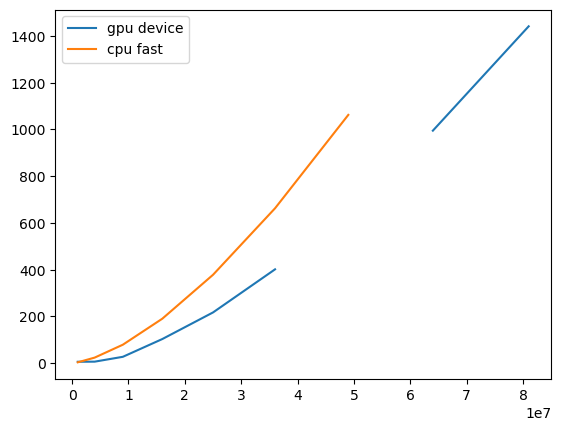

In [31]:
times = np.genfromtxt("./Run1_20Tasks/run_times_30000_1000_20                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      _20full.csv", delimiter=",")[:,:-1]#,invalid_raise=False)#, usemask=True)

plt.plot(times[:,0]**2,times[:,1],label="gpu device")
plt.plot(times[:,0]**2,times[:,2],label="cpu fast")
#semilogy, plot

plt.legend()
#plt.savefig("times.png")
#plt.show()


## Same number of operations with different tasknumber
Tasks per Node needs to be lower. Maybe if you have many tasks in one node, the gpu transfer is bottled and therefore has a stark increase, whereas the cpu is relativley even.

[0.57883, 1.1401, 2.4276, 5.4083, 13.458, 37.222, 208.24]
[0.33149, 0.33323, 0.34594, 0.35679, 0.37806, 0.43757, 0.63962]


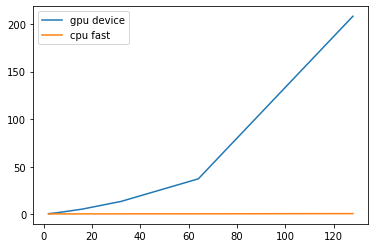

In [9]:
tasks = [2,4,8,16,32,64,128]
time_array = []

time_array =   np.genfromtxt(f"./Run3_same_Tasksize/run_times_200_200_256_only256.csv", delimiter=",")[:-1]#,invalid_raise=False)#, usemask=True))

time_cpu = []
time_gpu = []
for array in time_array:
    time_gpu.append(array[1])
    time_cpu.append(array[2])
print(time_gpu)    
print(time_cpu)    

plt.plot(tasks,time_gpu,label="gpu device")

plt.plot(tasks, time_cpu,label="cpu fast")

plt.legend()
#plt.savefig("times5_to_20.png")
# Note: Tasks Per Node

## Vary only Loop number
1 gpu per task, otherwise all 16 gpus.

Size: 5000x5000. 

Number of Opersations per task: 5120/tasknum

In [19]:
tasks_cpu = np.array([k for k in range(128,4*128,32)],dtype=int)

tasks_gpu1 = np.array([k for k in range(4,16,2)],dtype=int)

tasks_gpu2 = np.array([k for k in range(16,64,4)],dtype=int)

time_cpu = []
time_gpu1 = []
time_gpu2 = []

for calc_num in tasks_cpu[:5]:
    time_cpu.append(np.genfromtxt(f"./Run7_number_ops/run_times_5000_5000_{int(5120/calc_num)}_cpu_conf_cpt2_test.csv", delimiter=",")[:-1][1])
    #,invalid_raise=False)#, usemask=True))
    if(time_cpu[-1]==0):
        time_cpu[-1] = None

for calc_num in tasks_gpu1:
    time_gpu1.append(np.genfromtxt(f"./Run7_number_ops/run_times_5000_5000_{int(5120/calc_num)}_gpu_conf_gpt2_test.csv", delimiter=",")[:-1][1])
    if(time_gpu1[-1]==0):
        time_gpu1[-1] = None

for calc_num in tasks_gpu2[:6]:
    time_gpu2.append(np.genfromtxt(f"./Run7_number_ops/run_times_5000_5000_{int(5120/calc_num)}_gpu_conf_gpt3.csv", delimiter=",")[:-1][1])
    if(time_gpu2[-1]==0):
        time_gpu2[-1] = None
print(time_cpu)
print(tasks_cpu)


print(time_gpu1)
print(tasks_gpu1)

print(time_gpu2)
print(tasks_gpu2)

[None, None, None, 1840.8, 1656.3]
[128 160 192 224 256 288 320 352 384 416 448 480]
[None, 1843.2, 1382.4, 1105.4, 920.1, 788.65]
[ 4  6  8 10 12 14]
[None, None, 1846.6, 1579.7, 1389.3, 1232.1]
[16 20 24 28 32 36 40 44 48 52 56 60]


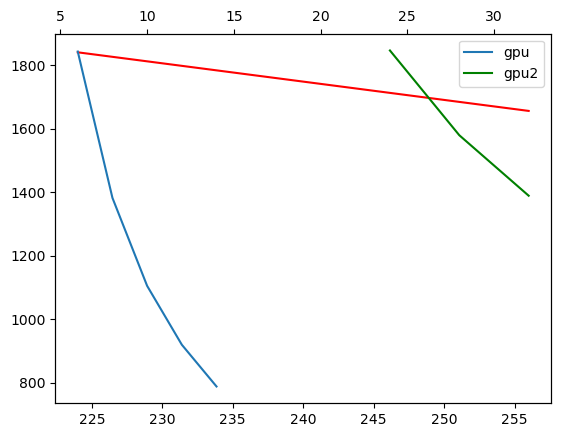

In [21]:

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(tasks_cpu[:5],time_cpu[:5],color='red',label='cpu')
ax2.plot(tasks_gpu1,time_gpu1,label='gpu')
ax2.plot(tasks_gpu2[:5],time_gpu2[:5],color='green',label='gpu2')

plt.legend()
#plt.savefig("GPU_CPU_Diff.png")


### 2nd try

In [25]:
tasks_cpu = np.array([k for k in range(64,9*64,64)],dtype=int)
tasks_cpu

array([ 64, 128, 192, 256, 320, 384, 448, 512])

In [26]:
tasks_gpu1 = np.array([k for k in range(4,16,2)],dtype=int)
tasks_gpu1

array([ 4,  6,  8, 10, 12, 14])

In [ ]:

tasks_gpu1 = np.array([k for k in range(4,16,2)],dtype=int)

#tasks_gpu2 = np.array([k for k in range(16,64,4)],dtype=int)

time_cpu = []
time_gpu1 = []
#time_gpu2 = []

for calc_num in tasks_cpu[:5]:
    time_cpu.append(np.genfromtxt(f"./Run7_number_ops/run_times_5000_5000_{int(5120/calc_num)}_cpu_conf_cpt2_test.csv", delimiter=",")[:-1][1])
    #,invalid_raise=False)#, usemask=True))
    if(time_cpu[-1]==0):
        time_cpu[-1] = None

for calc_num in tasks_gpu1:
    time_gpu1.append(np.genfromtxt(f"./Run7_number_ops/run_times_5000_5000_{int(5120/calc_num)}_gpu_conf_gpt2_test.csv", delimiter=",")[:-1][1])
    if(time_gpu1[-1]==0):
        time_gpu1[-1] = None

for calc_num in tasks_gpu2[:6]:
    time_gpu2.append(np.genfromtxt(f"./Run7_number_ops/run_times_5000_5000_{int(5120/calc_num)}_gpu_conf_gpt3.csv", delimiter=",")[:-1][1])
    if(time_gpu2[-1]==0):
        time_gpu2[-1] = None
print(time_cpu)
print(tasks_cpu)


print(time_gpu1)
print(tasks_gpu1)

print(time_gpu2)
print(tasks_gpu2)